In [67]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img

# hyperparameters info
batch_size = 16
learning_rate = 0.0001
epochs = 4
num_classes = 10
subtract_pixel_mean = True
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# cifar10 laebl dict
label_dict={0:"airplain",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",
            6:"frog",7:"horse",8:"ship",9:"truck"} 

optimizer = optimizers.gradient_descent_v2.SGD(learning_rate=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

# load cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### print training image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


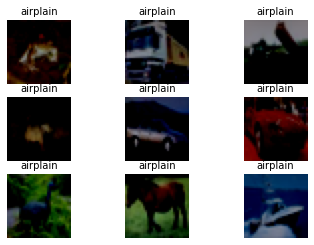

In [80]:
# Q5.1

def show_Cifar10_training_img():

	for i in range(9):

		# define subplot
		plt.subplot(330 + 1 + i)

		# close axis
		plt.axis("off")

		# plot raw pixel data
		plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

		# show label title
		title = label_dict[y_train[i][0]]
		plt.title (title, fontsize=10) 

	plt.show()
show_training_img()

#### print hyperparameters

In [16]:
# Q5.2

def print_training_hyperparameters_info():
    print('Batch size: {}'.format(batch_size))
    print('Optimizer : {}'.format(optimizer.get_config()))
    
print_training_hyperparameters_info()

Batch size: 64
Optimizer : {'name': 'SGD', 'learning_rate': 0.0001, 'decay': 1e-06, 'momentum': 0.9, 'nesterov': True}


#### print model structe

In [91]:
# Q5.3

def print_model_structe():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                    input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.summary()





Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 64)       

In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            shuffle=True)
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/4
3125/3125 [==============================] - 155s 49ms/step - loss: 2.1798 - accuracy: 0.1955 - val_loss: 2.0224 - val_accuracy: 0.2518
Epoch 2/4
3125/3125 [==============================] - 137s 44ms/step - loss: 2.0157 - accuracy: 0.2479 - val_loss: 1.9120 - val_accuracy: 0.3102
Epoch 3/4
3125/3125 [==============================] - 136s 43ms/step - loss: 1.9066 - accuracy: 0.3000 - val_loss: 1.7664 - val_accuracy: 0.3792
Epoch 4/4
3125/3125 [==============================] - 137s 44ms/step - loss: 1.7890 - accuracy: 0.3406 - val_loss: 1.6624 - val_accuracy: 0.4062
Saved trained model at /Users/nerohin/NCKU_CVDL2021/homework_1/Q5.Training_Cifar10_Classifier_Using_VGG16/saved_models/keras_cifar10_trained_model.h5 


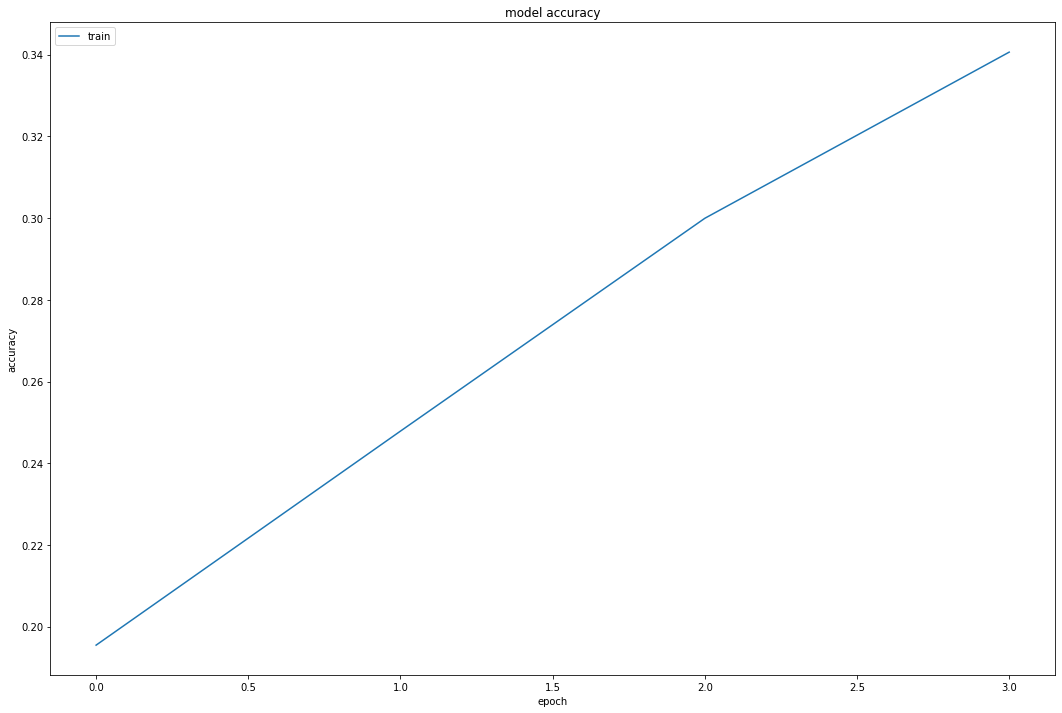

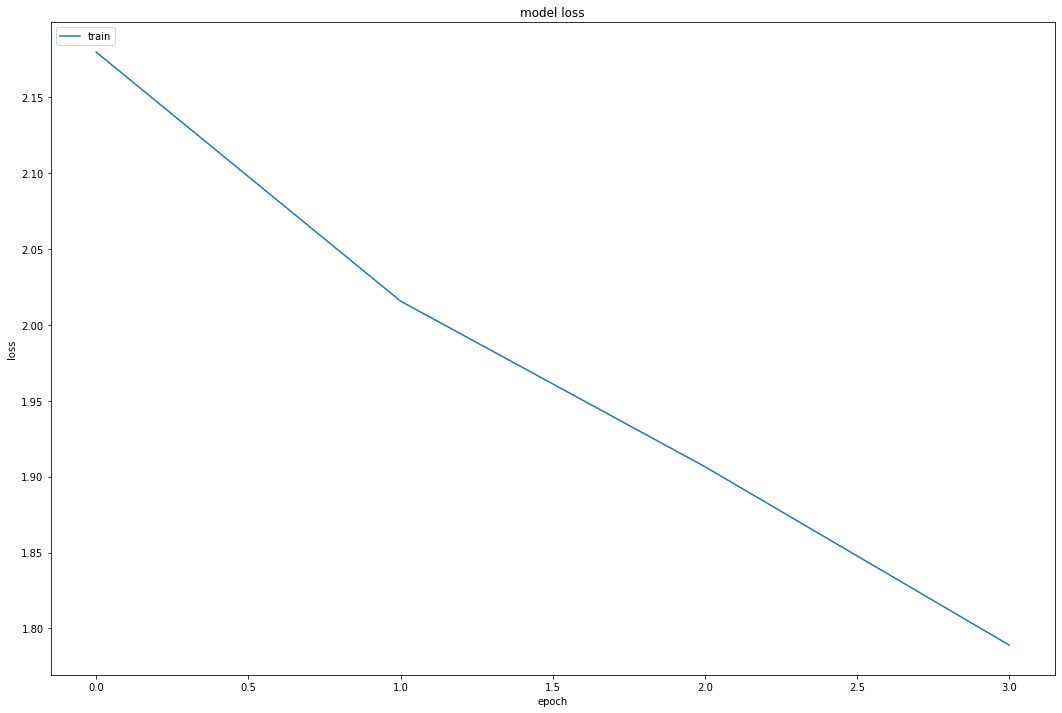

In [76]:
# plt.figure(figsize=(18,12))
# plt.plot(history.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.savefig("vgg16_accuracy.png")
# plt.show()


# # summarize history for loss
# plt.figure(figsize=(18,12))
# plt.plot(history.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.savefig("vgg16_loss.png")
# plt.show()


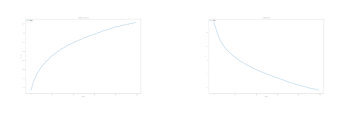

In [94]:
# Q5.4

def show_auc_and_loss_img():
    #plt.figure(figsize=(36,28))
    plt.subplot(221)
    auc = mpimg.imread('vgg16_accuracy.png')
    auc_plot = plt.imshow(auc)
    plt.axis("off")
    plt.subplot(222)
    loss = mpimg.imread('vgg16_loss.png')
    loss_plot = plt.imshow(loss)
    plt.axis("off")
    plt.show()

show_auc_and_loss_img()


SystemExit: 0

/opt/anaconda3/envs/CVDL/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


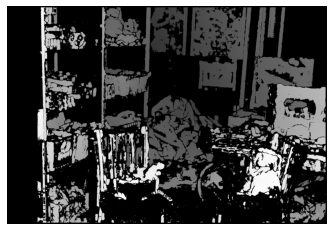

In [126]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('/Users/nerohin/NCKU_CVDL2021/homework_1/Q3.Stereo_Disparity_Map/Q3_Image/imL.png',0)
imgR = cv2.imread('/Users/nerohin/NCKU_CVDL2021/homework_1/Q3.Stereo_Disparity_Map/Q3_Image/imR.png',0)
stereo = cv2.StereoBM_create(numDisparities=256, blockSize=25)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.axis("off")
plt.show()


In [131]:
shark_img_1 = cv2.imread('homework_1/Q4.SIFT/Q4_Image/Shark1.jpg')  
shark_img_2 = cv2.imread('homework_1/Q4.SIFT/Q4_Image/Shark2.jpg')  
gray_shark_img_1 = cv2.cvtColor(shark_img_1, cv2.COLOR_BGR2GRAY)
gray_shark_img_2 = cv2.cvtColor(shark_img_2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray_shark_img_1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/features2d/src/sift.dispatch.cpp:477: error: (-5:Bad argument) image is empty or has incorrect depth (!=CV_8U) in function 'detectAndCompute'
